# Predicción mediante técnicas de IA - Trabajo final - Cuaderno de análisis exploratorio y preprocesamiento de los datos

Realizado por

* Manuel Alejandro De la Rosa Gómez
* Diego Alejandro Campuzano Botero
* Gabriel Jaime Orrego Restrepo

Reglas generales:

1. Cada columna de valores, tiene una correspondiente columna de calidad
2. Si el valor es -9999, se considera valor faltante
3. Si la CALIDAD del valor es mayor a 4, se considera valor faltante

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import scipy.stats as stats
from preprocessing_functions import (
    drop_serial_code, 
    drop_nulls_columns,
    drop_quality_columns,
    fill_nulls_with_monthly_mean
)
from plotting_functions import (
    plot_histograms,
    plot_box_and_whiskers
)

KeyboardInterrupt: 

In [2]:
df=pd.read_csv('input/raw/SIATA/joint_data/28.csv')

# Descarte de filas con calidad baja

Se procede a descartar del dataset original proporcionado por el SIATA las variables que no contienen ningún valor válido y se recodifican los valores faltantes o no válidos

In [3]:
df.columns

Index(['Fecha_Hora', 'codigoSerial', 'pm25', 'calidad_pm25', 'pm10',
       'calidad_pm10', 'pm1', 'calidad_pm1', 'no', 'calidad_no', 'no2',
       'calidad_no2', 'nox', 'calidad_nox', 'ozono', 'calidad_ozono', 'co',
       'calidad_co', 'so2', 'calidad_so2', 'pst', 'calidad_pst', 'dviento_ssr',
       'calidad_dviento_ssr', 'haire10_ssr', 'calidad_haire10_ssr', 'p_ssr',
       'calidad_p_ssr', 'pliquida_ssr', 'calidad_pliquida_ssr', 'rglobal_ssr',
       'calidad_rglobal_ssr', 'taire10_ssr', 'calidad_taire10_ssr',
       'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [4]:
df = drop_serial_code(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62112 entries, 0 to 62111
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha_Hora            62112 non-null  object 
 1   pm25                  62112 non-null  float64
 2   calidad_pm25          62112 non-null  float64
 3   pm10                  62112 non-null  float64
 4   calidad_pm10          62112 non-null  float64
 5   pm1                   62112 non-null  float64
 6   calidad_pm1           62112 non-null  float64
 7   no                    62112 non-null  float64
 8   calidad_no            62112 non-null  float64
 9   no2                   62112 non-null  float64
 10  calidad_no2           62112 non-null  float64
 11  nox                   62112 non-null  float64
 12  calidad_nox           62112 non-null  float64
 13  ozono                 62112 non-null  float64
 14  calidad_ozono         62112 non-null  float64
 15  co                 

In [6]:
# # Replace -9999 with NaN
df.replace(-9999.0, np.nan, inplace=True)

In [7]:
# Get the percentage of missing values by column
missing_values = df.isnull().mean() * 100

In [8]:
df = drop_nulls_columns(df)

In [9]:
df.columns

Index(['Fecha_Hora', 'pm25', 'calidad_pm25', 'calidad_pm10', 'calidad_pm1',
       'no', 'calidad_no', 'no2', 'calidad_no2', 'nox', 'calidad_nox',
       'calidad_ozono', 'calidad_co', 'calidad_so2', 'calidad_pst',
       'dviento_ssr', 'calidad_dviento_ssr', 'haire10_ssr',
       'calidad_haire10_ssr', 'p_ssr', 'calidad_p_ssr', 'calidad_pliquida_ssr',
       'rglobal_ssr', 'calidad_rglobal_ssr', 'taire10_ssr',
       'calidad_taire10_ssr', 'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [10]:
df = drop_quality_columns(df)

In [11]:
df.columns

Index(['Fecha_Hora', 'pm25', 'calidad_pm25', 'no', 'calidad_no', 'no2',
       'calidad_no2', 'nox', 'calidad_nox', 'dviento_ssr',
       'calidad_dviento_ssr', 'haire10_ssr', 'calidad_haire10_ssr', 'p_ssr',
       'calidad_p_ssr', 'rglobal_ssr', 'calidad_rglobal_ssr', 'taire10_ssr',
       'calidad_taire10_ssr', 'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [12]:
df.shape

(62112, 21)

In [13]:
df.sample(10)

Fecha_Hora  pm25  calidad_pm25         no  calidad_no  \
48243  2023-07-04 03:00:00   2.0           2.1  10.748200         1.0   
51140  2023-11-01 20:00:00  25.0           1.0  23.979500         1.0   
27557  2021-02-22 05:00:00  19.0           1.0  32.393000         3.1   
2091   2018-03-29 03:00:00  45.0           1.0  -0.160278         3.0   
996    2018-02-11 12:00:00  31.0           1.0   2.934720         1.0   
43867  2023-01-02 19:00:00  12.0           1.0  -4.146800         3.0   
37726  2022-04-21 22:00:00   9.0           1.0  13.116800         1.0   
21722  2020-06-24 02:00:00  19.0           1.0   6.736300         1.0   
24155  2020-10-03 11:00:00  30.0           1.0   7.926400         1.0   
46962  2023-05-11 18:00:00  14.0           1.0  10.076400         1.0   

           no2  calidad_no2      nox  calidad_nox  dviento_ssr  ...  \
48243   2.9306          1.0  13.6788          1.0      319.500  ...   
51140  39.7808          1.0  63.7603          1.0        0.000  ...   
27557   0.5251          3.1  32.9181          3.1      345.900  ...   
2091   11.5136          2.6  11.3582          2.6      243.462  ...   
996    21.0162          1.0  23.8882          1.0      116.875  ...   
43867  15.6418          2.6  11.4950          2.6      223.500  ...   
37726  14.8850          1.0  28.0018          1.0       11.400  ...   
21722   9.6621          1.0  16.3984          1.0      201.000  ...   
24155  26.3310          1.0  34.2574          1.0      312.100  ...   
46962  24.5133          1.0  34.5897          1.0        2.100  ...   

       haire10_ssr  calidad_haire10_ssr    p_ssr  calidad_p_ssr  rglobal_ssr  \
48243      84.6000                  1.0  636.800            1.0       0.0000   
51140      77.5000                  1.0  635.700            1.0       0.7700   
27557      73.8000                  1.0  634.900            1.0       0.0000   
2091       82.7597                  1.0  634.502            1.0       0.0000   
996        68.7217                  1.0  636.139            1.0      53.5417   
43867      69.1000                  1.0  635.600            1.0       0.0000   
37726      72.0000                  1.0  636.800            1.0       0.1900   
21722      71.8000                  1.0  636.100            1.0       0.0000   
24155      49.0000                  1.0  635.500            1.0     513.4800   
46962      66.6000                  1.0  635.100            1.0       0.9100   

       calidad_rglobal_ssr  taire10_ssr  calidad_taire10_ssr  vviento_ssr  \
48243                  1.0      18.6000                  1.0     0.000000   
51140                  1.0      20.0000                  1.0     0.000000   
27557                  1.0      18.6000                  1.0     0.800000   
2091                   1.0      18.3400                  1.0     0.025055   
996                    1.0      20.5283                  1.0     0.505155   
43867                  1.0      19.0000                  1.0     1.600000   
37726                  1.0      19.8000                  1.0     0.700000   
21722                  1.0      20.4000                  1.0     0.600000   
24155                  1.0      24.6000                  1.0     0.700000   
46962                  1.0      20.8000                  1.0     0.300000   

       calidad_vviento_ssr  
48243                  1.0  
51140                  1.0  
27557                  1.0  
2091                   1.0  
996                    1.0  
43867                  1.0  
37726                  1.0  
21722                  1.0  
24155                  1.0  
46962                  1.0  

[10 rows x 21 columns]

In [14]:
df_pm25=df[['Fecha_Hora','pm25', 'calidad_pm25']]

In [15]:
df_pm25[df_pm25['calidad_pm25']>=4]

Fecha_Hora  pm25  calidad_pm25
109    2018-01-05 13:00:00   NaN          4.31
188    2018-01-08 20:00:00   NaN          4.31
189    2018-01-08 21:00:00   NaN          4.31
190    2018-01-08 22:00:00   NaN          4.31
191    2018-01-08 23:00:00   NaN          4.31
...                    ...   ...           ...
62049  2025-01-29 09:00:00   NaN          4.31
62050  2025-01-29 10:00:00   NaN          4.31
62051  2025-01-29 11:00:00   NaN          4.31
62052  2025-01-29 12:00:00   NaN          4.31
62053  2025-01-29 13:00:00   NaN          4.31

[1024 rows x 3 columns]

In [16]:
# Summarize the data
df.describe()

pm25  calidad_pm25             no    calidad_no            no2  \
count  61456.000000  62100.000000   60362.000000  62100.000000   60362.000000   
mean      28.315421      1.113602      22.606775      1.501262      25.162279   
std       96.568308      0.512689    1058.115315      0.805705    1064.763963   
min    -9990.000000      1.000000     -21.164900      1.000000     -19.282600   
25%       14.000000      1.000000       3.130775      1.000000       9.648050   
50%       20.000000      1.000000       8.271700      1.000000      15.289250   
75%       29.000000      1.000000      21.944500      1.900000      21.561300   
max      985.000000      4.310000  229377.000000      4.310000  186048.000000   

        calidad_no2            nox   calidad_nox   dviento_ssr  \
count  62100.000000   60362.000000  62100.000000  59683.000000   
mean       1.443159      61.808253      1.449203    125.015967   
std        0.778090    2643.192293      0.778874    982.499634   
min        1.000000      -7.358900      1.000000  -9993.000000   
25%        1.000000      16.175600      1.000000    130.614000   
50%        1.000000      26.059750      1.000000    231.000000   
75%        1.800000      41.841675      1.800000    329.823500   
max        4.310000  307230.000000      4.310000    360.000000   

       calidad_dviento_ssr   haire10_ssr  calidad_haire10_ssr         p_ssr  \
count         62100.000000  59750.000000         62100.000000  59750.000000   
mean              1.179819    -20.880984             1.151688    546.401587   
std               0.725734    916.840865             0.689443    968.869560   
min               1.000000  -9993.000000             1.000000  -9993.000000   
25%               1.000000     50.500000             1.000000    634.600000   
50%               1.000000     67.500000             1.000000    635.600000   
75%               1.000000     76.431775             1.000000    636.400000   
max               4.310000     88.349900             4.310000    639.400000   

       calidad_p_ssr   rglobal_ssr  calidad_rglobal_ssr   taire10_ssr  \
count   62100.000000  59678.000000         62100.000000  59750.000000   
mean        1.190112     20.188694             1.154946    -61.932929   
std         0.734200    935.479908             0.697048    912.935014   
min         1.000000  -9993.000000             1.000000  -9993.000000   
25%         1.000000      0.000000             1.000000     19.200000   
50%         1.000000      1.770000             1.000000     21.200000   
75%         1.000000    166.355000             1.000000     24.500000   
max         4.310000    822.719000             4.310000     33.400000   

       calidad_taire10_ssr   vviento_ssr  calidad_vviento_ssr  
count         62100.000000  59749.000000         62100.000000  
mean              1.171173    -83.006966             1.270260  
std               0.712749    910.998493             0.813952  
min               1.000000  -9993.000000             1.000000  
25%               1.000000      0.200000             1.000000  
50%               1.000000      0.600000             1.000000  
75%               1.000000      1.100000             1.000000  
max               4.310000      4.493070             4.310000

In [17]:
# Percentage of data with 'pm25' = -9999
(df['pm25'] == -9999).sum() / len(df) * 100

np.float64(0.0)

In [18]:
# Group data by 'calidad_pm25', count the number of records and show as percentage of total
df_grouped=df.groupby('calidad_pm25').size().reset_index(name='counts')

df_grouped['percentage'] = df_grouped['counts']/df_grouped['counts'].sum()*100

In [19]:
df_grouped

calidad_pm25  counts  percentage
0         1.0000   58640   94.428341
1         2.0000      48    0.077295
2         2.1000     418    0.673108
3         2.2000     276    0.444444
4         2.3000     828    1.333333
5         2.4000      19    0.030596
6         2.5000      69    0.111111
7         3.0000     110    0.177134
8         3.1000     653    1.051530
9         3.2000      15    0.024155
10        4.1964       1    0.001610
11        4.1989       1    0.001610
12        4.2985     379    0.610306
13        4.3100     643    1.035427

In [20]:
#elegir las columnas del analisis, en si los datos que se van a usar y no la calidad de los datos
columnas_filtradas= [col for col in df.columns if "calidad" not in col]
df_nuevo = df[columnas_filtradas]

In [21]:
df_nuevo.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr'],
      dtype='object')

In [22]:
# Convertir la columna 'Fecha_Hora' a tipo datetime
df_nuevo['Fecha_Hora'] = pd.to_datetime(df_nuevo['Fecha_Hora'], format='%Y-%m-%d %H:%M:%S')

# Eliminar filas con fechas del año 2025
df_nuevo = df_nuevo[df_nuevo["Fecha_Hora"].dt.year < 2025]

/tmp/ipykernel_430396/2672353939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Fecha_Hora'] = pd.to_datetime(df_nuevo['Fecha_Hora'], format='%Y-%m-%d %H:%M:%S')


# Llenado de nulos

Inicialmente se visualizan los datos crudos con histogramas

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62112 entries, 0 to 62111
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fecha_Hora           62112 non-null  object 
 1   pm25                 61456 non-null  float64
 2   calidad_pm25         62100 non-null  float64
 3   no                   60362 non-null  float64
 4   calidad_no           62100 non-null  float64
 5   no2                  60362 non-null  float64
 6   calidad_no2          62100 non-null  float64
 7   nox                  60362 non-null  float64
 8   calidad_nox          62100 non-null  float64
 9   dviento_ssr          59683 non-null  float64
 10  calidad_dviento_ssr  62100 non-null  float64
 11  haire10_ssr          59750 non-null  float64
 12  calidad_haire10_ssr  62100 non-null  float64
 13  p_ssr                59750 non-null  float64
 14  calidad_p_ssr        62100 non-null  float64
 15  rglobal_ssr          59678 non-null 

In [24]:
# df_nuevo will be df with the columns that end with _mean, fecha_hora and PM25
# df_nuevo = df[df.columns[df.columns.str.endswith('_mean') | df.columns.isin(['fecha_hora', 'PM25'])]]
df_nuevo = df[df.columns[~df.columns.str.startswith('calidad')]]

In [25]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62112 entries, 0 to 62111
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_Hora   62112 non-null  object 
 1   pm25         61456 non-null  float64
 2   no           60362 non-null  float64
 3   no2          60362 non-null  float64
 4   nox          60362 non-null  float64
 5   dviento_ssr  59683 non-null  float64
 6   haire10_ssr  59750 non-null  float64
 7   p_ssr        59750 non-null  float64
 8   rglobal_ssr  59678 non-null  float64
 9   taire10_ssr  59750 non-null  float64
 10  vviento_ssr  59749 non-null  float64
dtypes: float64(10), object(1)
memory usage: 5.2+ MB


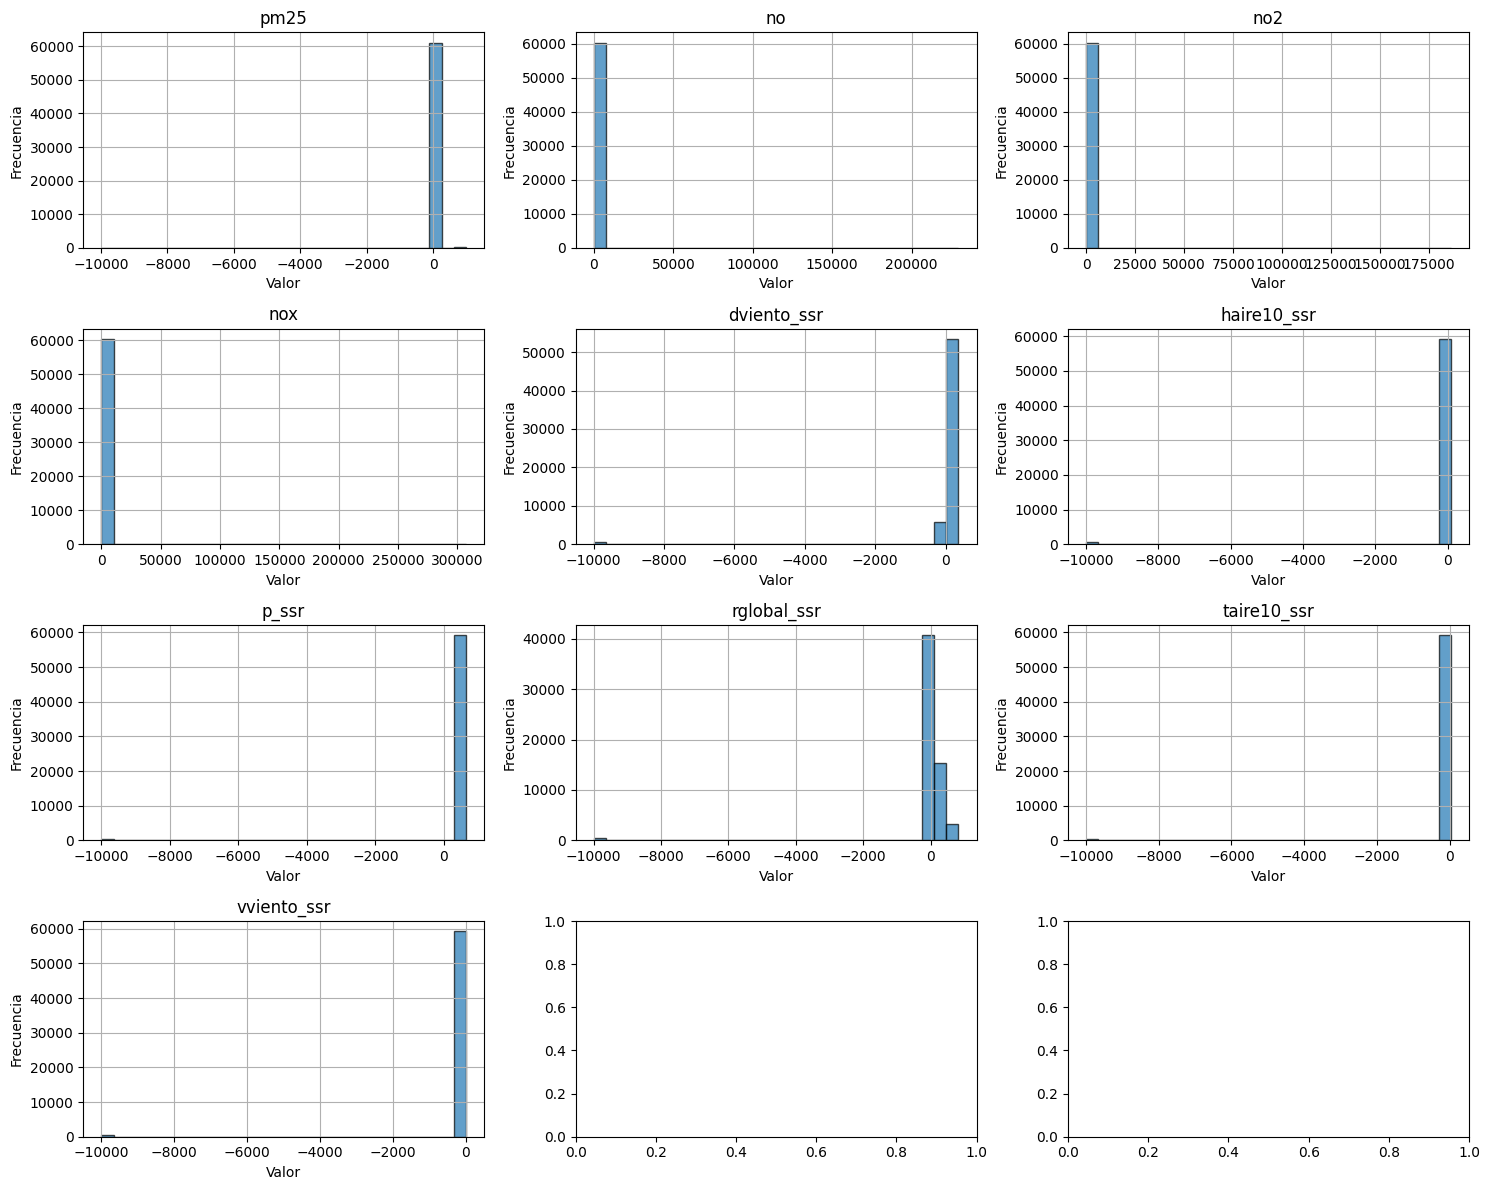

In [26]:
plot_histograms(df_nuevo)

Luego, con diagramas de caja y bigotes.

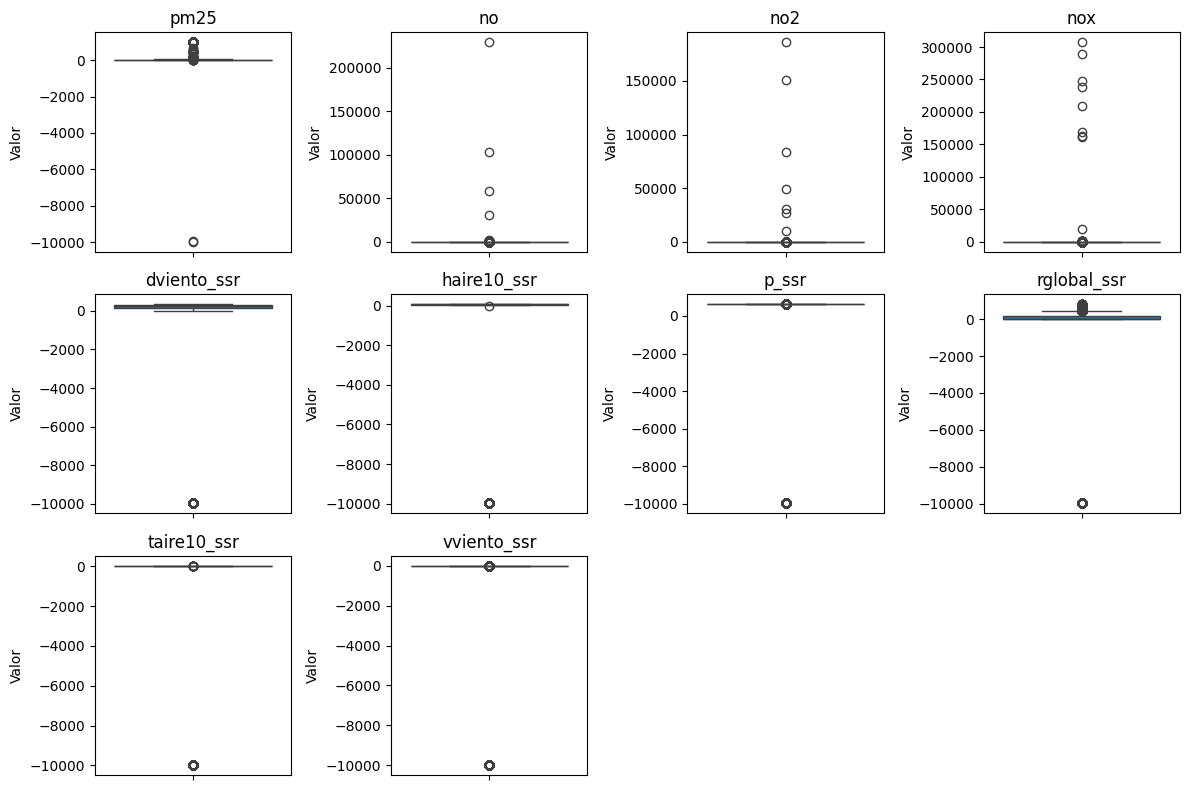

In [27]:
plot_box_and_whiskers(df_nuevo)

Se observan datos atípicos muy alejados de la media, que seguramente corresponden a valores faltantes codificados por el SIATA

## Llenado de nulos con la media mensual (descartando datos atípicos)

In [28]:
df_nuevo['Fecha_Hora'] = pd.to_datetime(df_nuevo['Fecha_Hora'])

# Crear columnas de año y mes
df_nuevo['Año'] = df_nuevo['Fecha_Hora'].dt.year
df_nuevo['Mes'] = df_nuevo['Fecha_Hora'].dt.month

/tmp/ipykernel_430396/1181957836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Fecha_Hora'] = pd.to_datetime(df_nuevo['Fecha_Hora'])
/tmp/ipykernel_430396/1181957836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Año'] = df_nuevo['Fecha_Hora'].dt.year
/tmp/ipykernel_430396/1181957836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

## PM2.5

In [29]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62112 entries, 0 to 62111
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha_Hora   62112 non-null  datetime64[ns]
 1   pm25         61456 non-null  float64       
 2   no           60362 non-null  float64       
 3   no2          60362 non-null  float64       
 4   nox          60362 non-null  float64       
 5   dviento_ssr  59683 non-null  float64       
 6   haire10_ssr  59750 non-null  float64       
 7   p_ssr        59750 non-null  float64       
 8   rglobal_ssr  59678 non-null  float64       
 9   taire10_ssr  59750 non-null  float64       
 10  vviento_ssr  59749 non-null  float64       
 11  Año          62112 non-null  int32         
 12  Mes          62112 non-null  int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 5.7 MB


In [30]:
df_nuevo = fill_nulls_with_monthly_mean(df_nuevo, 'pm25', 0, 40)

In [31]:
df_nuevo['pm25'].describe()

count    62112.000000
mean        20.145791
std          8.693428
min          0.000000
25%         14.000000
50%         20.000000
75%         26.586139
max         40.000000
Name: pm25, dtype: float64

## NO

In [32]:
df_nuevo = fill_nulls_with_monthly_mean(df_nuevo, 'no', 0, 120)

## NO2

In [33]:
df_nuevo = fill_nulls_with_monthly_mean(df_nuevo, 'no2', 0, 75)

## NOx

In [34]:
df_nuevo = fill_nulls_with_monthly_mean(df_nuevo, 'nox', 0, 100)

## Direccion Viento

In [35]:
df_nuevo = fill_nulls_with_monthly_mean(df_nuevo, 'dviento_ssr', -360, 360)

## Humedad

In [36]:
df_nuevo = fill_nulls_with_monthly_mean(df_nuevo, 'haire10_ssr', 0, 100)

## Presion atmosferica

In [37]:
df_nuevo = fill_nulls_with_monthly_mean(df_nuevo, 'p_ssr', 0, 1000000)

## Radiacion

In [38]:
df_nuevo = fill_nulls_with_monthly_mean(df_nuevo, 'rglobal_ssr', 0, 1000000)

## Temperatura

In [39]:
df_nuevo = fill_nulls_with_monthly_mean(df_nuevo, 'taire10_ssr', 0, 1000000)

## Velocidad Viento

In [40]:
df_nuevo = fill_nulls_with_monthly_mean(df_nuevo, 'vviento_ssr', 0, 1000000) 

## Histograma de datos limpios

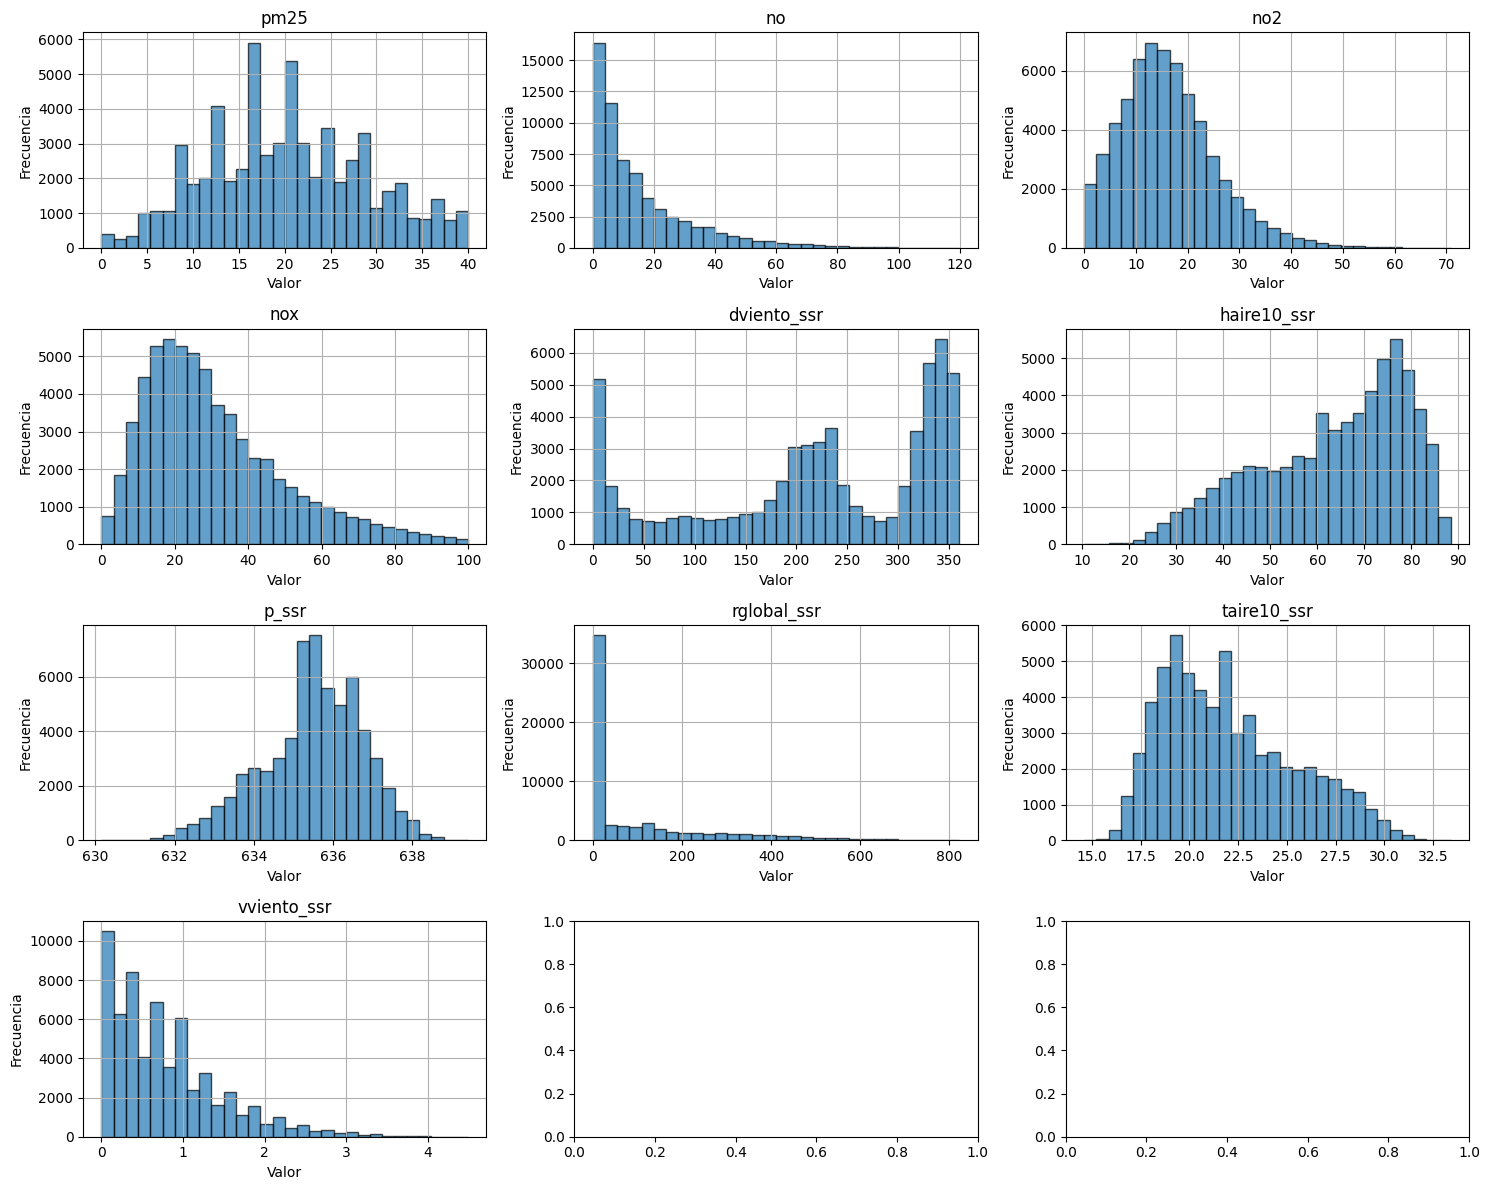

In [41]:
plot_histograms(df_nuevo.drop(columns=['Año', 'Mes', 'Fecha_Hora']))

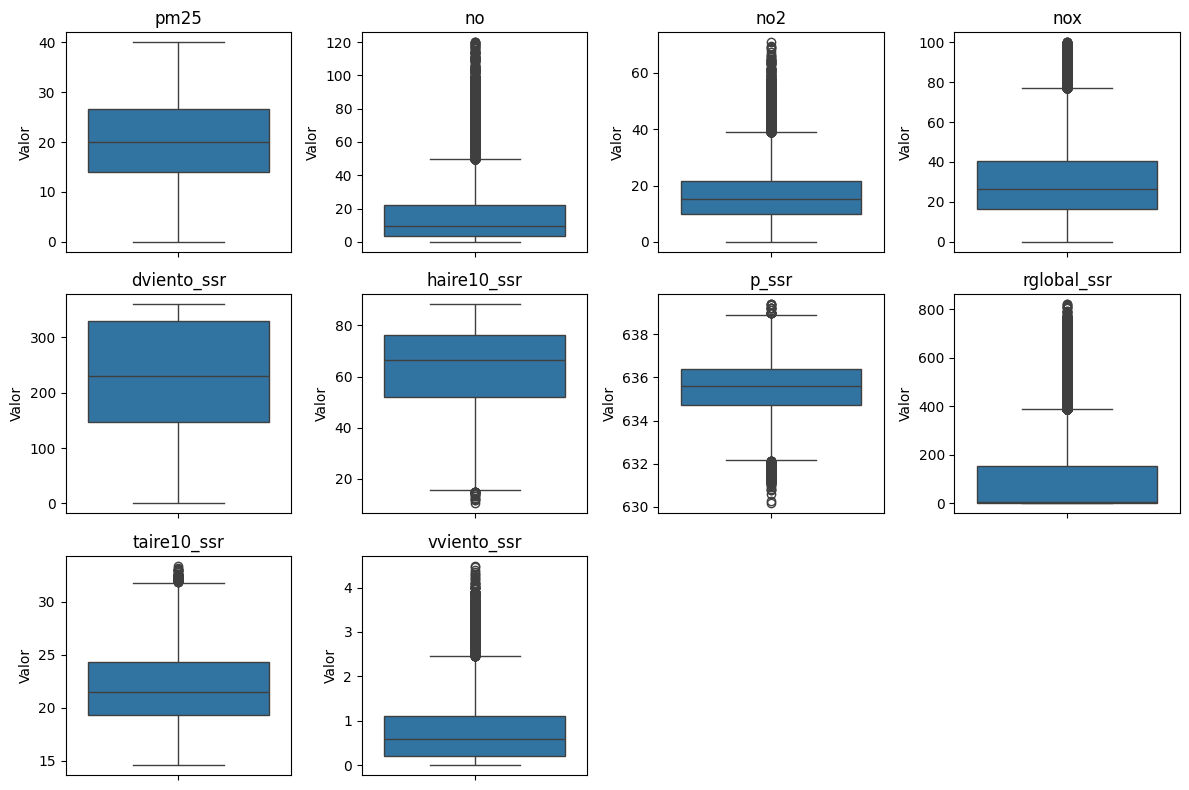

In [42]:
plot_box_and_whiskers(df_nuevo.drop(columns=['Fecha_Hora', 'Año', 'Mes']))

# Análisis de autocorrelaciones

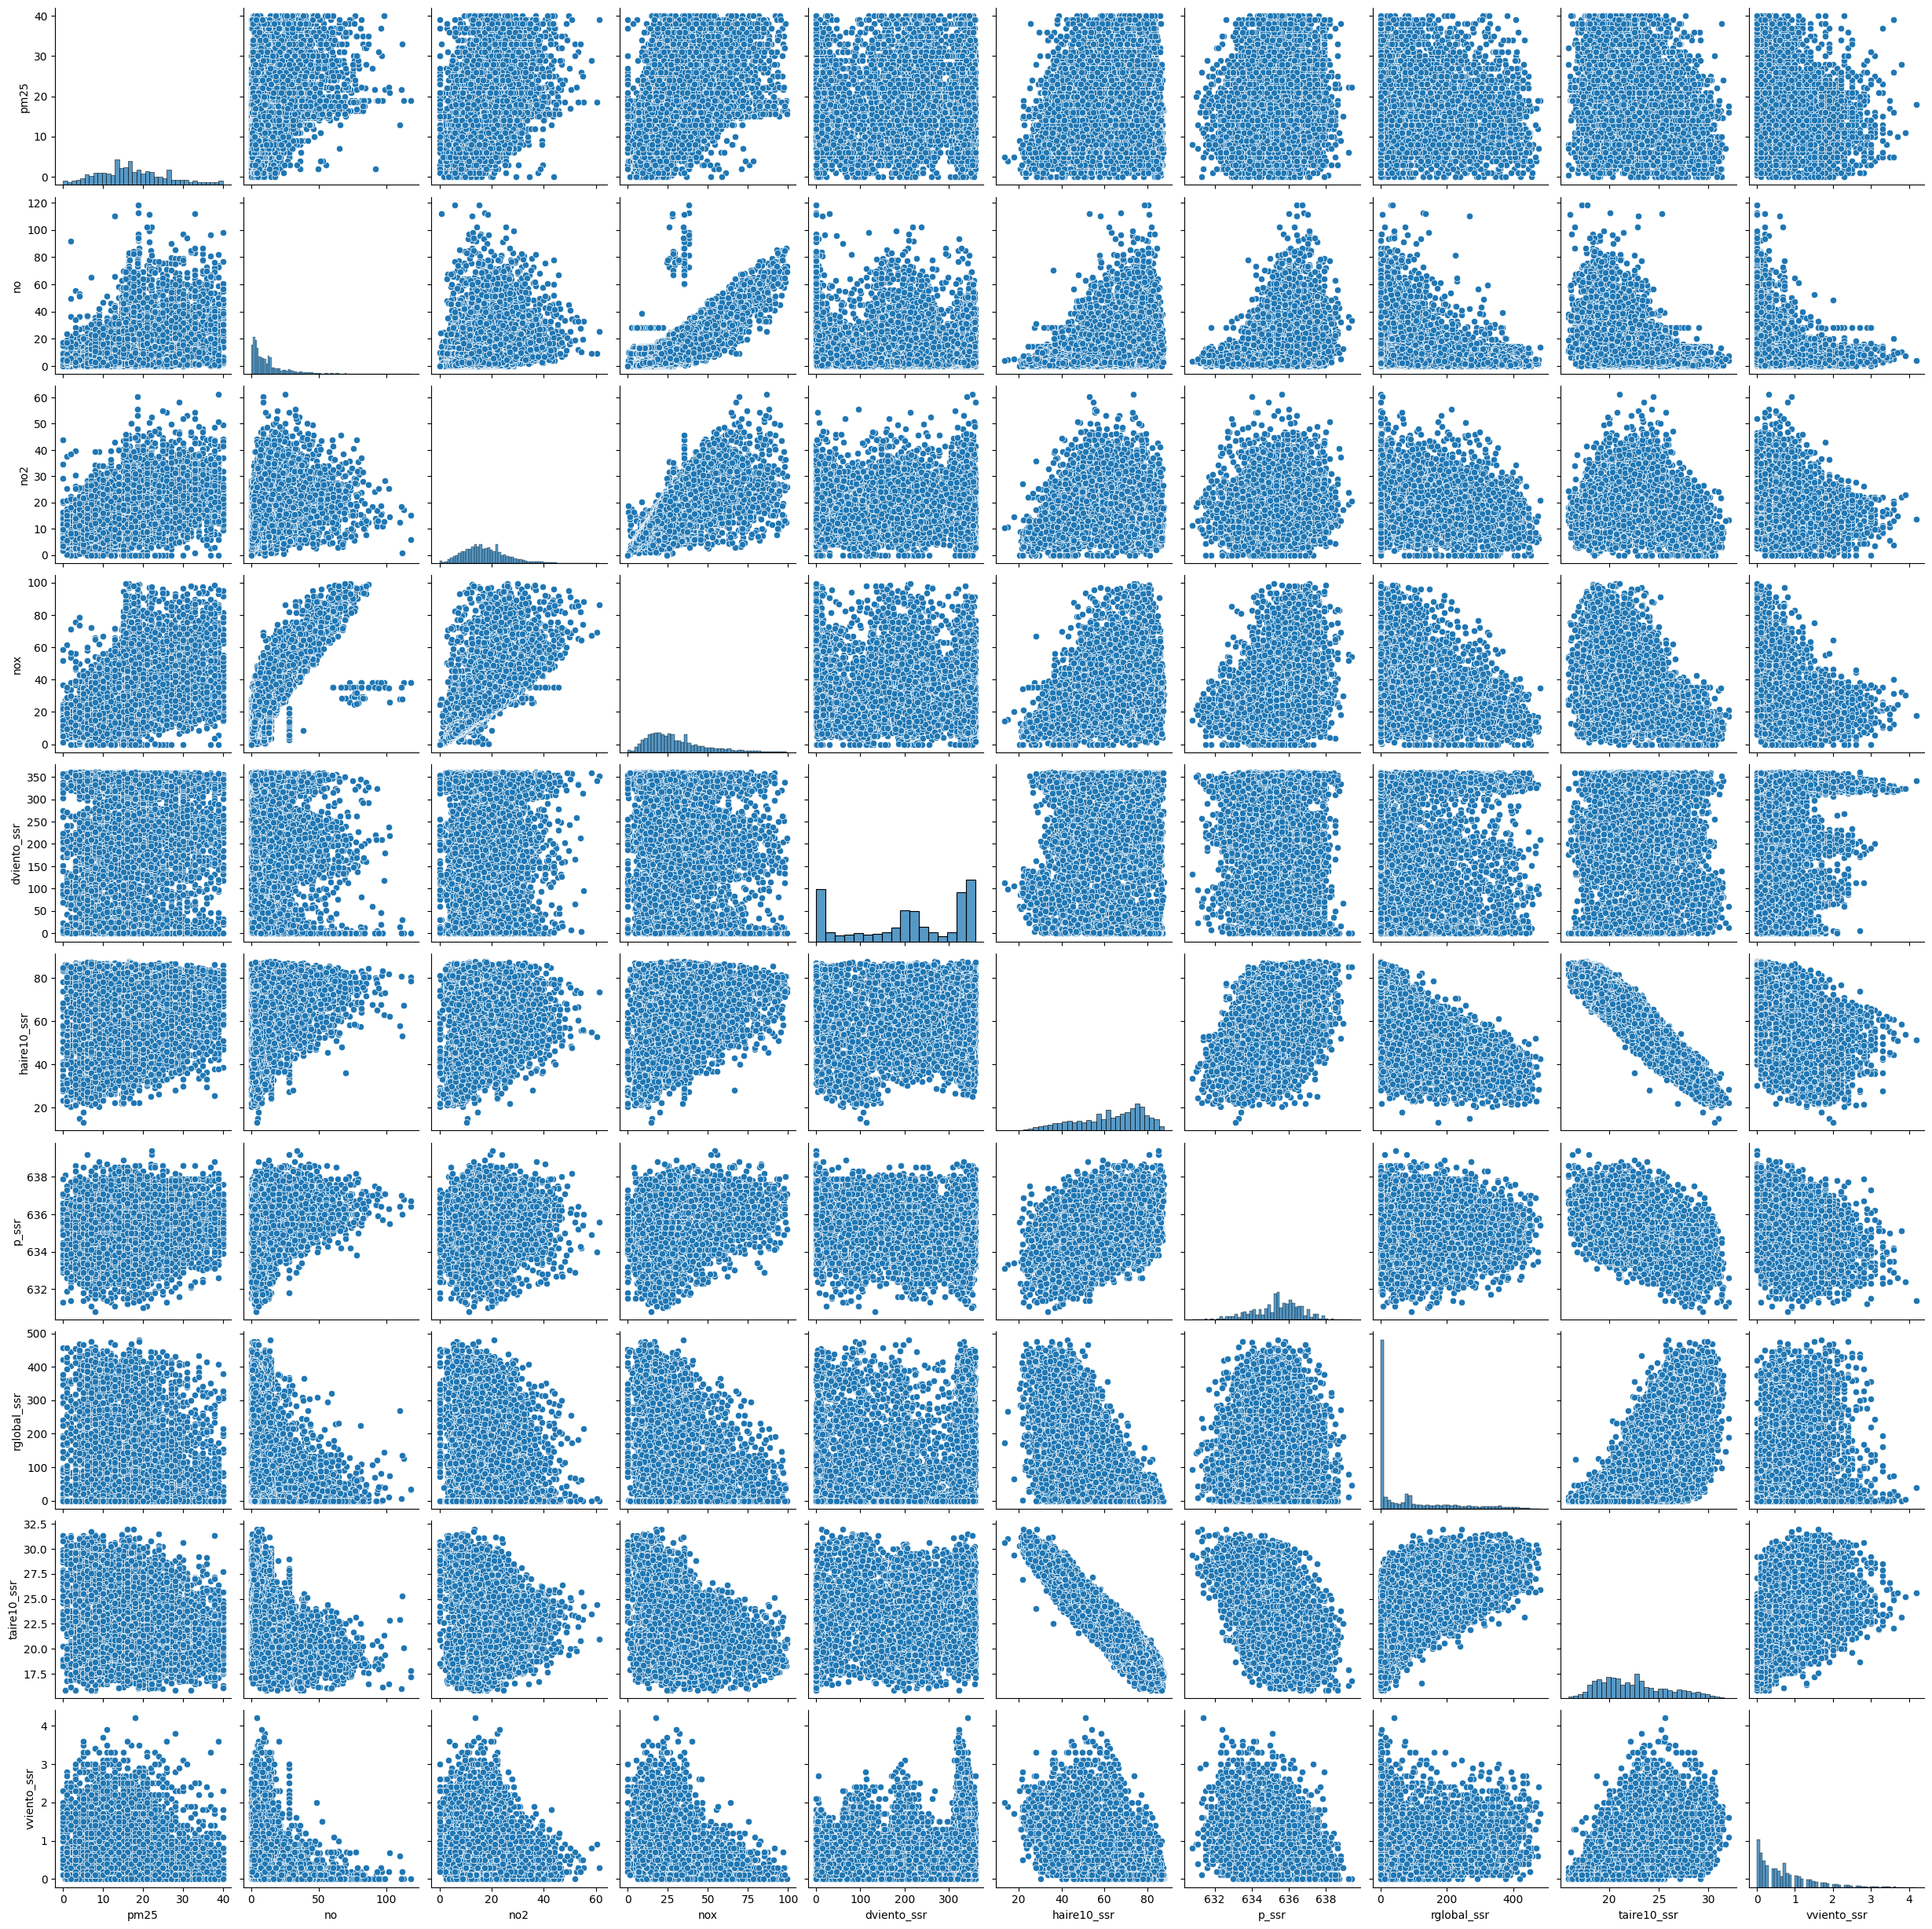

In [43]:
# Seaborn scatter plot matrix
sns.pairplot(df_nuevo[df_nuevo['Año']==2023].drop(columns=['Fecha_Hora', 'Año', 'Mes']))

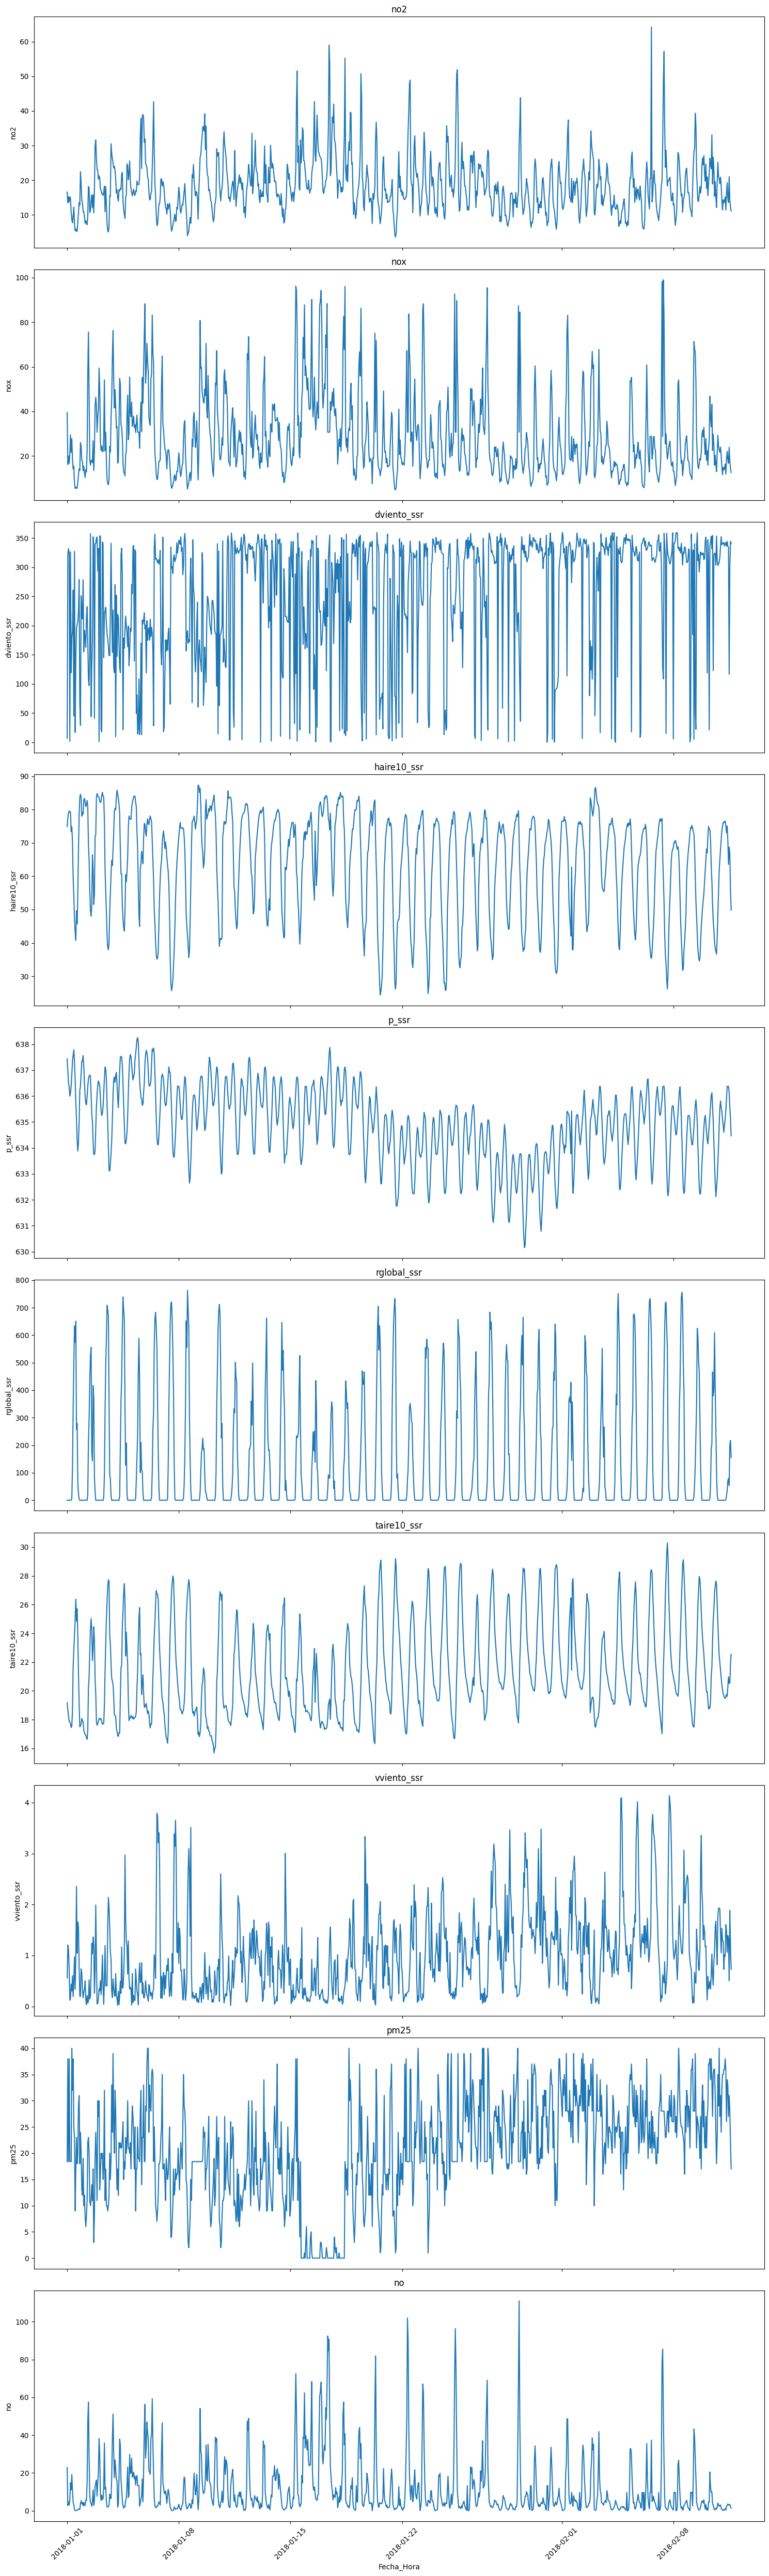

In [44]:
# Plot the time series of pm25 and the other variables
fig, axs = plt.subplots(len(df_nuevo.columns)-3, 1, figsize=(15, 5*(len(df_nuevo.columns)-3)), sharex=True)
for i, col in enumerate(df_nuevo.columns):
    if col not in ['Fecha_Hora', 'Año', 'Mes']:
        axs[i-3].plot(df_nuevo['Fecha_Hora'].head(1000), df_nuevo[col].head(1000))
        axs[i-3].set_title(col)
        axs[i-3].set_ylabel(col)
plt.xlabel('Fecha_Hora')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62112 entries, 0 to 62111
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha_Hora   62112 non-null  datetime64[ns]
 1   pm25         62112 non-null  float64       
 2   no           62112 non-null  float64       
 3   no2          62112 non-null  float64       
 4   nox          62112 non-null  float64       
 5   dviento_ssr  62112 non-null  float64       
 6   haire10_ssr  62112 non-null  float64       
 7   p_ssr        62112 non-null  float64       
 8   rglobal_ssr  62112 non-null  float64       
 9   taire10_ssr  62112 non-null  float64       
 10  vviento_ssr  62112 non-null  float64       
 11  Año          62112 non-null  int32         
 12  Mes          62112 non-null  int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 5.7 MB


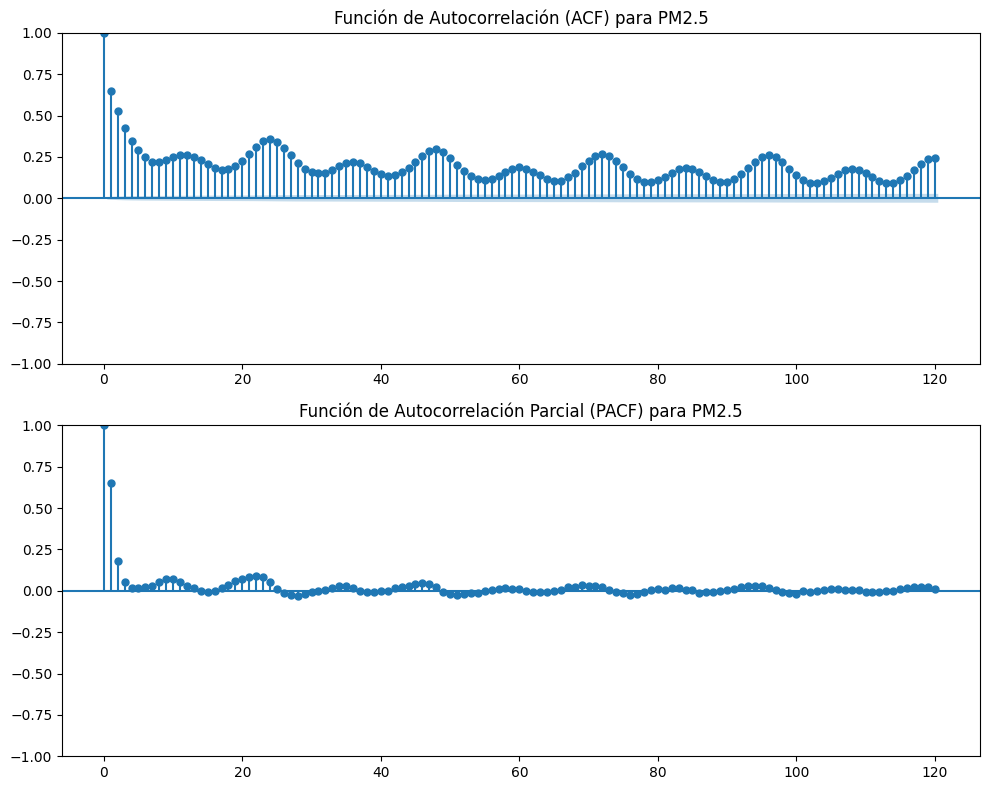

In [46]:
# Extraer la serie de PM2.5 y eliminar valores nulos
pm25 = df_nuevo["pm25"]

# Reducir la muestra si hay problemas de memoria
pm25_sampled = pm25  # Se puede ajustar según la necesidad

# Generar gráficos de ACF y PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de ACF (Autocorrelación)
plot_acf(pm25_sampled, lags=120, ax=ax[0])
ax[0].set_title("Función de Autocorrelación (ACF) para PM2.5")

# Gráfico de PACF (Autocorrelación Parcial)
plot_pacf(pm25_sampled, lags=120, ax=ax[1])
ax[1].set_title("Función de Autocorrelación Parcial (PACF) para PM2.5")

# Ajustar y mostrar los gráficos
plt.tight_layout()
plt.show()

In [47]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

pm25 = df_nuevo['pm25'].dropna()

# ADF test
adf_res = adfuller(pm25)
print('ADF stat:', adf_res[0], 'p-value:', adf_res[1])

# Ljung-Box (check if residuals are white noise, here for the series itself)
lb = acorr_ljungbox(pm25, lags=[3,6,12,24,48], return_df=True)
print(lb)

ADF stat: -16.94902568846897 p-value: 9.492050222715354e-30
          lb_stat  lb_pvalue
3    54813.476493        0.0
6    71355.815596        0.0
12   93095.876035        0.0
24  140102.323902        0.0
48  208298.388470        0.0


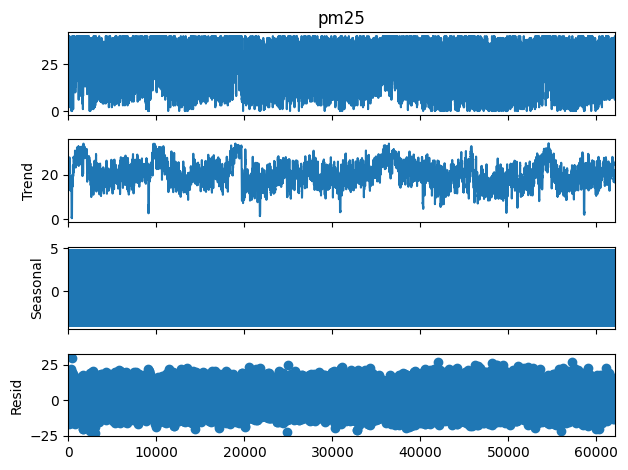

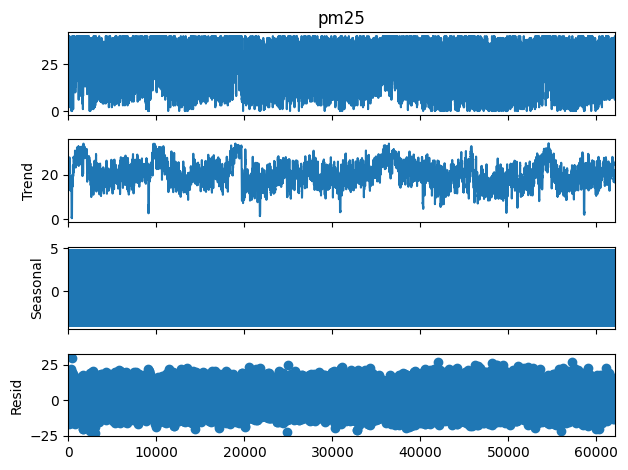

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

# If hourly with daily seasonality:
res = seasonal_decompose(pm25, model='additive', period=24)
res.plot()

In [49]:
from statsmodels.tsa.stattools import acf, pacf
acf_vals = acf(pm25, nlags=120)
for lag, val in enumerate(acf_vals[:121]):
    if abs(val) > 0.2:  # threshold to print interesting peaks
        print(lag, round(val, 3))

0 1.0
1 0.65
2 0.526
3 0.428
4 0.349
5 0.289
6 0.247
7 0.222
8 0.22
9 0.231
10 0.25
11 0.261
12 0.261
13 0.251
14 0.231
15 0.206
20 0.227
21 0.268
22 0.309
23 0.345
24 0.357
25 0.34
26 0.303
27 0.26
28 0.214
35 0.214
36 0.221
37 0.211
45 0.22
46 0.258
47 0.285
48 0.295
49 0.278
50 0.243
51 0.202
70 0.228
71 0.256
72 0.266
73 0.256
74 0.228
94 0.221
95 0.25
96 0.259
97 0.247
98 0.219
118 0.209
119 0.238
120 0.246


In [50]:
# Seleccionar la variable PM2.5 y reducir la muestra si es necesario
pm25 = df_nuevo["pm25"].dropna().iloc[:5000]  # Se eliminan valores nulos

# Calcular los valores de ACF y PACF
acf_values = acf(pm25, nlags=120, fft=True)  # Autocorrelación
pacf_values = pacf(pm25, nlags=120, method='ywm')  # Autocorrelación parcial

# Mostrar los valores calculados
print("Valores de ACF:", acf_values)
print("\nValores de PACF:", pacf_values)

Valores de ACF: [1.         0.68959741 0.58417598 0.48122173 0.40013342 0.34328801
 0.31562831 0.29428587 0.28960136 0.30005463 0.3206284  0.32590417
 0.32606527 0.32013925 0.31271017 0.2943902  0.26969176 0.25406657
 0.24770664 0.26251611 0.30235131 0.34383666 0.38096461 0.4205152
 0.43245267 0.40387406 0.37248131 0.33056865 0.29734976 0.25983367
 0.24996715 0.24153552 0.24702023 0.25629016 0.28191877 0.29732277
 0.30690082 0.29639068 0.28531901 0.25378652 0.23684222 0.21470706
 0.21660827 0.23362644 0.25764833 0.29913205 0.33234762 0.3579692
 0.36674694 0.35241037 0.31840699 0.28524332 0.24101553 0.21448686
 0.1897228  0.19061105 0.1894685  0.19885318 0.22880329 0.24709532
 0.26274351 0.25710064 0.24739348 0.22005767 0.20581545 0.18998411
 0.19082149 0.210057   0.23326173 0.26278191 0.29319158 0.3189648
 0.33953106 0.34210378 0.32143809 0.29248279 0.24391161 0.20905581
 0.1944872  0.19235272 0.20015912 0.21505689 0.23271463 0.2488847
 0.2593681  0.2565461  0.23437737 0.21431798 0.187

## Visualización de la serie de tiempo

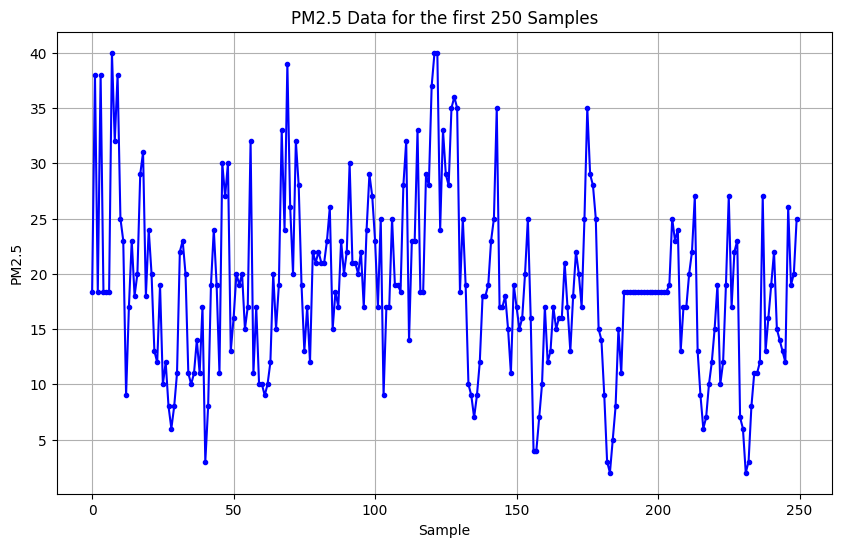

In [51]:
# Plot the PM2.5 data for the first 250 samples
plt.figure(figsize=(10, 6))
plt.plot(pm25_sampled[:250], marker='o', markersize=3, linestyle='-', color='b')
plt.title("PM2.5 Data for the first 250 Samples")
plt.xlabel("Sample")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()

In [52]:
df_nuevo.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'Año', 'Mes'],
      dtype='object')

## Correlaciones de Spearman y Kendall

Se elige analizar la correlación entre variables con los estadísticos de Spearman y de Kendall, dado que estos son no paramétricos y no parten de la suposición de que los datos distribuyen normalmente.

In [53]:
# Spearman correlation between 'pm25' and the other columns expect 'Año' and 'Mes'
correlations_spearman = df_nuevo.drop(columns=['Año', 'Mes', 'Fecha_Hora']).corrwith(df_nuevo['pm25'], method='spearman')

In [54]:
correlations_spearman

pm25           1.000000
no             0.298509
no2            0.362441
nox            0.438957
dviento_ssr    0.009197
haire10_ssr    0.153601
p_ssr          0.134380
rglobal_ssr   -0.070075
taire10_ssr   -0.177826
vviento_ssr   -0.242807
dtype: float64

In [55]:
correlations_kendall = df_nuevo.drop(columns=['Año', 'Mes', 'Fecha_Hora']).corrwith(df_nuevo['pm25'], method='kendall')
correlations_kendall

pm25           1.000000
no             0.204472
no2            0.249512
nox            0.305452
dviento_ssr    0.004800
haire10_ssr    0.105819
p_ssr          0.091638
rglobal_ssr   -0.049710
taire10_ssr   -0.122570
vviento_ssr   -0.168021
dtype: float64

## Análisis de correlación entre PM2.5 y valores rezagados de otras variables

Este análisis se hace con el fin de visualizar la influencia que tienen valores previos de PM2.5, otros contaminantes y variables meteorológicas sobre los valores presentes de PM2.5

In [56]:
def plot_lagged_correlations(df_instance, target_col, max_lag):
    df = df_instance.copy()
    variables = [col for col in df.columns if col not in ['Fecha_Hora', 'Año', 'Mes', target_col]]
    
    max_lag = 48  # Maximum lag to consider

    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 3 * len(variables)))

    for i, variable in enumerate(variables):
        lag_correlations = []
        for lag in range(1, max_lag + 1):
            df[f'{variable}_lag{lag}'] = df[variable].shift(lag)
            # Calculate correlation, ignoring NaN values
            corr = df[target_col].corr(df[f'{variable}_lag{lag}'], method='kendall')
            lag_correlations.append((lag, corr))
        
        # Plot in the corresponding subplot
        lags, corrs = zip(*lag_correlations)
        axes[i].plot(lags, corrs, marker='o')
        axes[i].axhline(y=0, color='r', linestyle='-', alpha=0.3)
        axes[i].set_xlabel('Lag (periods)')
        axes[i].set_ylabel('Correlation')
        axes[i].set_title(f'{target_col} correlation with lagged {variable} values')
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_430396/3343488692.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{variable}_lag{lag}'] = df[variable].shift(lag)
/tmp/ipykernel_430396/3343488692.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{variable}_lag{lag}'] = df[variable].shift(lag)
/tmp/ipykernel_430396/3343488692.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

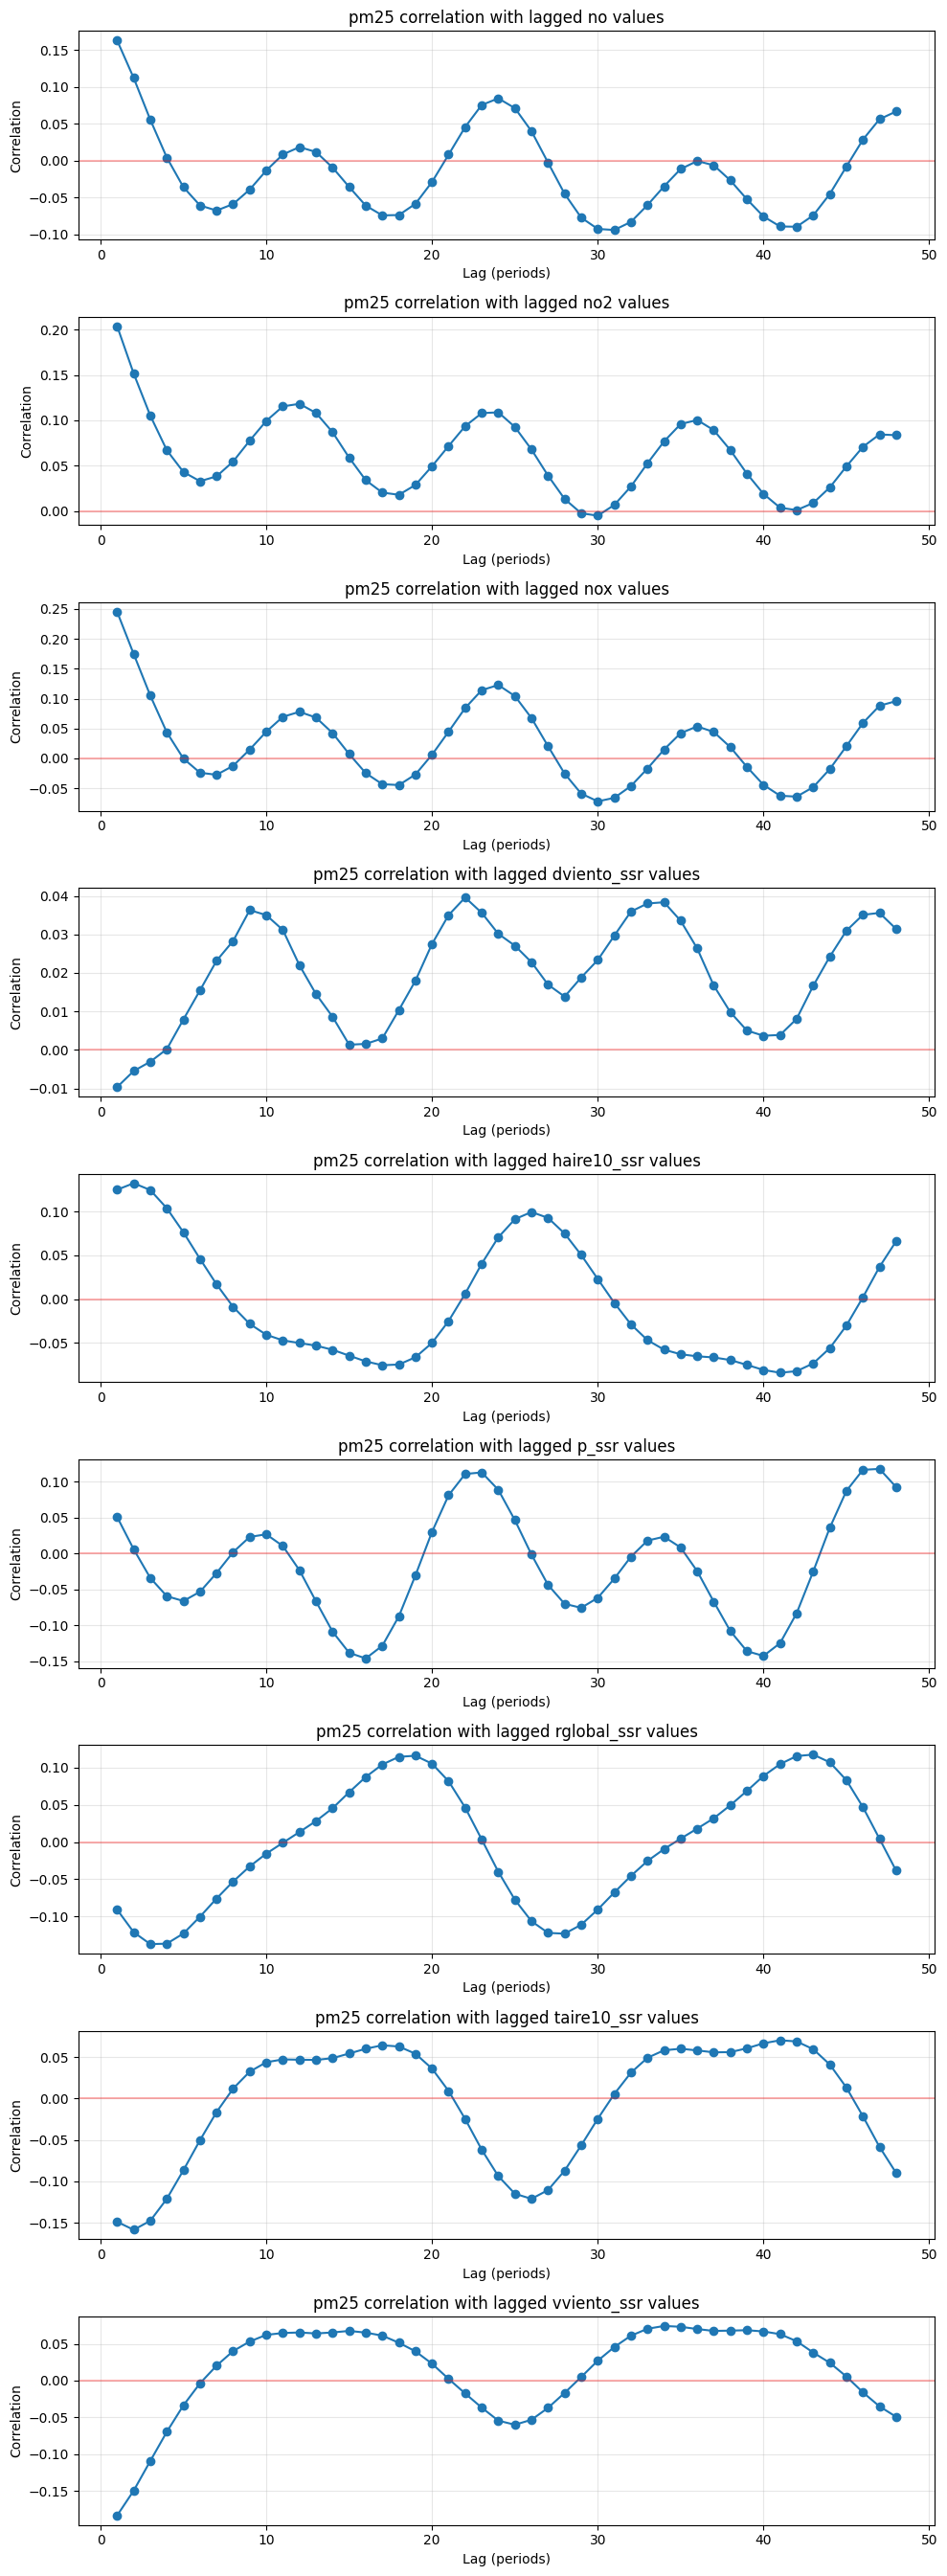

In [57]:
plot_lagged_correlations(df_nuevo, 'pm25', 48)

Para el entrenamiento del modelo predictivo, se decide agregar al conjunto de variables de entrada el valor de estas rezagado hacia atrás de 1 a 6 horas, 12 y 24 horas

In [58]:
def add_lagged_features(df_instance):
    df = df_instance.copy()
    variables = [col for col in df.columns if col not in ['Fecha_Hora', 'Año', 'Mes']]
    
    lag_list = [1, 2, 3, 4, 5, 6, 12, 24, 48]

    for variable in variables:
        for lag in lag_list:
            df[f'{variable}_lag{lag}'] = df[variable].shift(lag)
    
    # Drop rows with NaN values created by shifting
    df.dropna(inplace=True)
    
    return df

In [60]:
df_lagged = add_lagged_features(df_nuevo)

In [61]:
df_lagged.head()

Fecha_Hora  pm25        no      no2      nox  dviento_ssr  \
48 2018-01-03 00:00:00  30.0  38.13380  21.2862  59.4244      1.09221   
49 2018-01-03 01:00:00  13.0  29.50860  20.6678  50.1814    353.80400   
50 2018-01-03 02:00:00  16.0   8.93875  17.4482  26.3985    353.13900   
51 2018-01-03 03:00:00  20.0   5.34736  17.1350  22.4769     22.67570   
52 2018-01-03 04:00:00  19.0   8.32208  16.1589  24.4857     17.72440   

    haire10_ssr    p_ssr  rglobal_ssr  taire10_ssr  ...  taire10_ssr_lag48  \
48      83.6692  636.514          0.0      18.0611  ...            19.1710   
49      82.5296  636.377          0.0      18.1010  ...            18.6489   
50      82.1256  635.938          0.0      18.0008  ...            18.2408   
51      82.4653  635.428          0.0      18.0445  ...            17.8762   
52      84.1930  635.250          0.0      17.8754  ...            17.8206   

    vviento_ssr_lag1  vviento_ssr_lag2  vviento_ssr_lag3  vviento_ssr_lag4  \
48          0.145283          0.065239          0.046543          0.987977   
49          0.345046          0.145283          0.065239          0.046543   
50          0.306253          0.345046          0.145283          0.065239   
51          0.506755          0.306253          0.345046          0.145283   
52          0.231777          0.506755          0.306253          0.345046   

    vviento_ssr_lag5  vviento_ssr_lag6  vviento_ssr_lag12  vviento_ssr_lag24  \
48          1.986820          0.704363           0.640136           0.172479   
49          0.987977          1.986820           1.236440           0.279945   
50          0.046543          0.987977           1.031450           0.330529   
51          0.065239          0.046543           1.362950           0.501042   
52          0.145283          0.065239           1.211470           0.133372   

    vviento_ssr_lag48  
48           0.560345  
49           1.205480  
50           1.118560  
51           0.721186  
52           0.122182  

[5 rows x 103 columns]

In [62]:
df_lagged.drop(['Año', 'Mes'],inplace=True, axis=1)

In [63]:
df_lagged.to_csv('input/processed/28/28_datos_procesados.csv', index=False)